# EDA

Goal: Explore data with descriptive statitics and plots


## Imports

In [3]:
# imports
import os
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import autocorrelation_plot
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


## Read Data

In [6]:
# read data
def readData():
    path = os.path.join('..','CASE STUDY_DATA_LATE DELIVERY ROOT CAUSE.xlsx')
    df = pd.read_excel(path)

    return df

In [7]:
df = readData()
df.head()

,order_id,country,shipping_method,units_per_order,facility,product_category,on_sale,transit_days,returned,backorder,datetime_ordered,datetime_sourced,datetime_product_ready,datetime_planned,datetime_delivered,deadline_source,deadline_make,deadline_deliver,delivered_to_plan
0,E00000001,UNITED KINGDOM,Ground,1,OXFORD,ACCESSORIES,Y,2,NaN,NaN,2016-07-03 03:07:29,2016-07-03 04:09:49,2016-07-06 00:59:42,2016-07-08,2016-07-07,1612,38,3,PASS
1,E00000002,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,N,3,Y,NaN,2016-07-03 00:08:43,2016-07-03 02:16:24,2016-07-03 07:17:04,2016-07-06,2016-07-05,531,8,3,PASS
2,E00000003,FRANCE,Ground,1,ANTWERP,TOPS,Y,3,NaN,NaN,2016-07-03 00:36:00,2016-07-03 02:16:18,2016-07-03 06:16:57,2016-07-06,2016-07-05,504,8,3,PASS
3,E00000004,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,Y,5,NaN,NaN,2016-07-03 00:47:45,2016-07-03 02:16:18,2016-07-03 06:16:55,2016-07-07,2016-07-05,492,8,5,PASS
4,E00000005,UNITED KINGDOM,Next Day,1,OXFORD,JACKETS & VESTS,Y,1,NaN,NaN,2016-07-03 03:52:13,2016-07-03 07:56:33,2016-07-05 08:53:19,2016-07-06,2016-07-06,1567,6,1,PASS


## View Data

- 110,114 observations
- ~11% are failures
- ~56% of deliveries are to Germany
- ~10% items are on backorder

In [4]:
df['delivered_to_plan'].value_counts()

PASS    98523
FAIL    11591
Name: delivered_to_plan, dtype: int64

In [8]:
df['country'].value_counts()

GERMANY           61764
UNITED KINGDOM    34707
FRANCE            10253
SWEDEN             2434
BELGIUM             478
NETHERLANDS         478
Name: country, dtype: int64

In [19]:
# number of items on backorder
df['backorder'].value_counts()[0] / len(df)

0.1099769329967125

In [10]:
len(np.unique(df['product_category']))

3

In [14]:
len(np.unique(df['units_per_order']))
np.mean(df['transit_days'])

2.3813048295402948

In [6]:
df.describe()

,units_per_order,transit_days,deadline_source,deadline_make,deadline_deliver
count,110114.000000,110114.000000,110114.000000,110114.000000,110114.000000
mean,1.042329,2.381305,1336.617297,40.581806,3.515829
std,0.496093,1.113712,1105.341513,25.320339,1.741056
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,479.000000,23.000000,2.000000
50%,1.000000,2.000000,1104.000000,32.000000,3.000000
75%,1.000000,3.000000,1566.000000,52.000000,5.000000
max,50.000000,8.000000,6392.000000,168.000000,14.000000


## Data Cleaning

- make columns categorical: ['order_id','country','shipping_method','facility','product_category','on_sale','returned,'backorder','delivered_to_plan']

- Convert NaN to N: ['returned','backorder']

In [16]:
def cleanCols(df):
    nan_cols = ['returned','backorder']
    df[nan_cols] = df[nan_cols].fillna('N')
    
    # make cateogrical columns
    cat_cols = df.select_dtypes(include=['object']).columns
    df[cat_cols] = df[cat_cols].apply(lambda x: x.astype('category')).copy()
    
    return df

In [17]:
nan_cols = ['returned','backorder']
df[nan_cols] = df[nan_cols].fillna('N')

In [18]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.astype('category')).copy()

Index(['order_id', 'country', 'shipping_method', 'facility',
       'product_category', 'on_sale', 'returned', 'backorder',
       'delivered_to_plan'],
      dtype='object')

In [20]:
df.dtypes

order_id                        category
country                         category
shipping_method                 category
units_per_order                    int64
facility                        category
product_category                category
on_sale                         category
transit_days                       int64
returned                        category
backorder                       category
datetime_ordered          datetime64[ns]
datetime_sourced          datetime64[ns]
datetime_product_ready    datetime64[ns]
datetime_planned          datetime64[ns]
datetime_delivered        datetime64[ns]
deadline_source                    int64
deadline_make                      int64
deadline_deliver                   int64
delivered_to_plan               category
dtype: object

## Plotting
- Most orders are from Germany
- Most orders are ground
- 11% of all orders have failures

In [21]:
# plotting
plt.rcParams['figure.figsize'] = 6, 6
plt.rcParams['axes.facecolor']='white'
sns.set(style="white", context="talk")
#sns.palettes = sns.color_palette("Set2", 10)

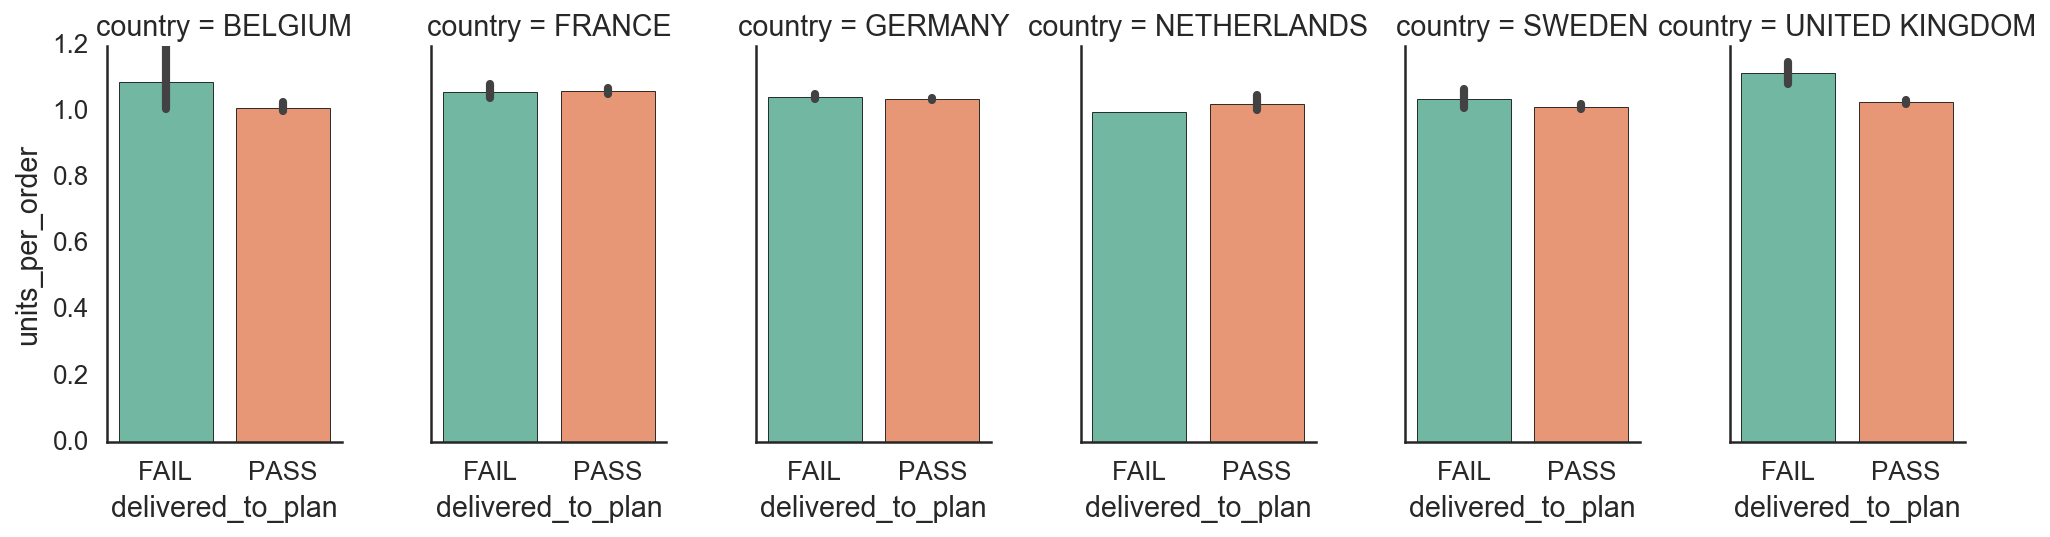

In [37]:
g = sns.FacetGrid(df, col="country", size=4, aspect=.6)
g.map(sns.barplot, "delivered_to_plan","units_per_order", palette=sns.color_palette("Set2", 10))

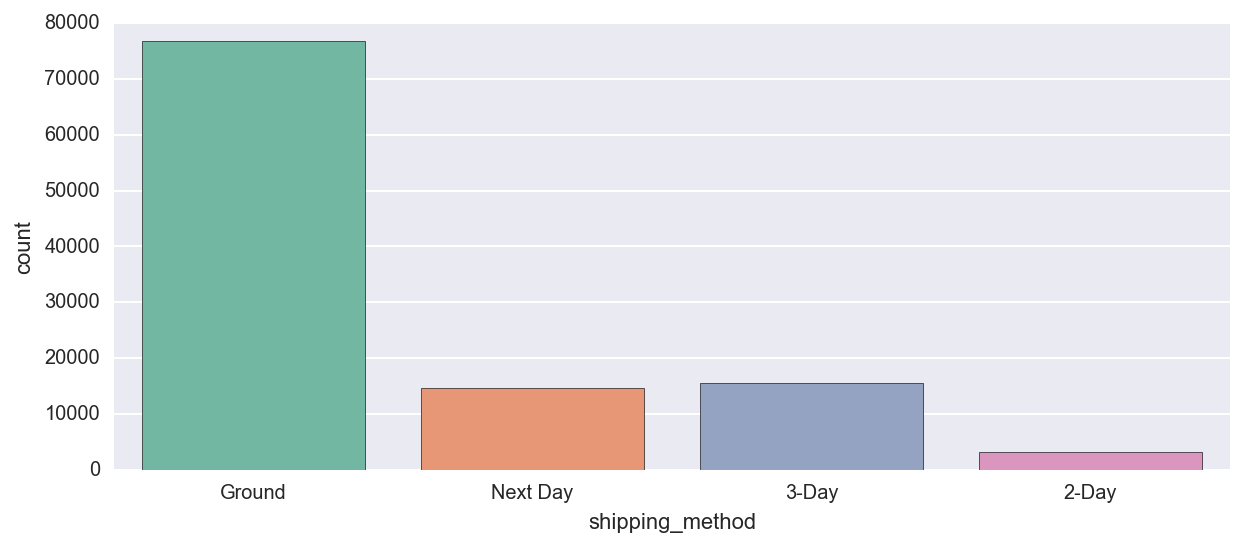

In [23]:
plt.rcParams['figure.figsize'] = 10,4
sns.countplot(df['shipping_method'], palette=sns.color_palette("Set2", 10))

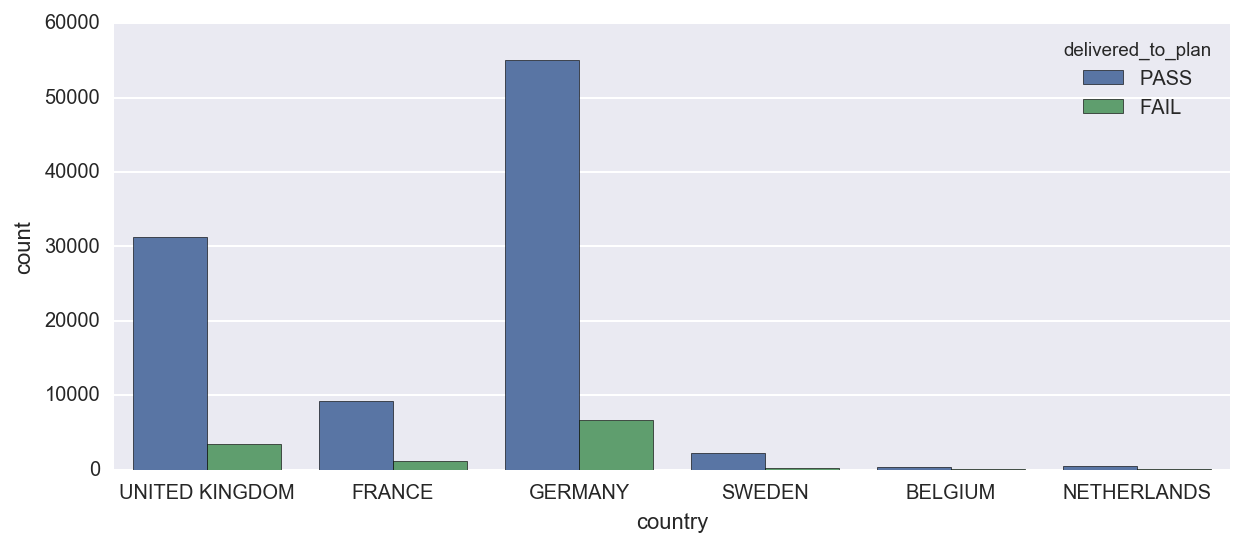

In [22]:
plt.rcParams['figure.figsize'] = 10,4
sns.countplot(x="country", data=df, hue = 'delivered_to_plan')

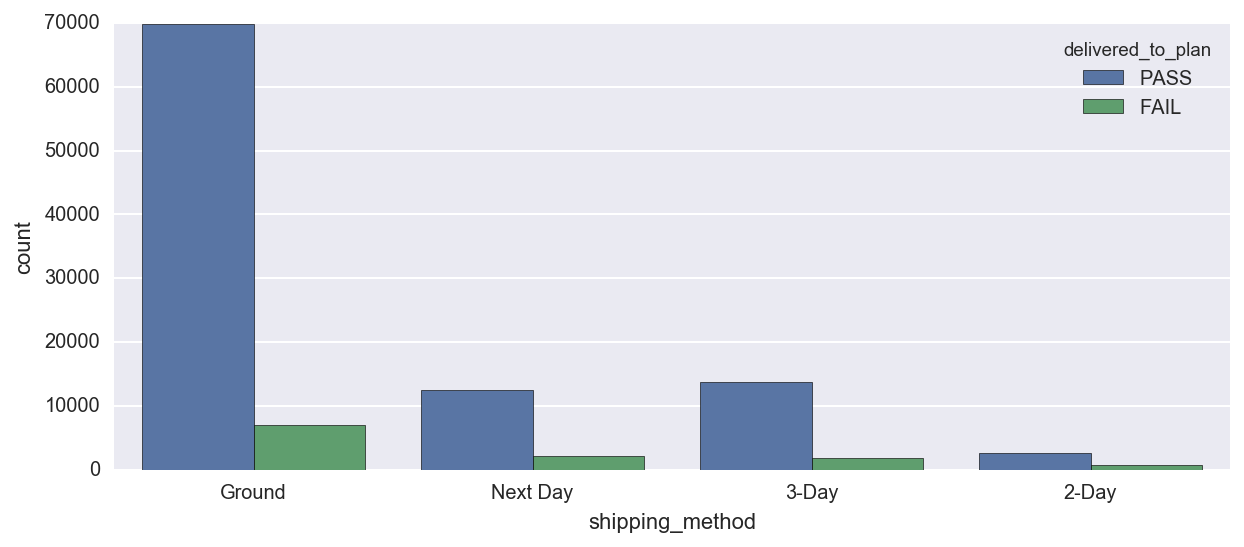

In [21]:
plt.rcParams['figure.figsize'] = 10,4
sns.countplot(x="shipping_method", data=df, hue = 'delivered_to_plan')

In [19]:
pd.crosstab(df['delivered_to_plan'], df['shipping_method'])

shipping_method,2-Day,3-Day,Ground,Next Day
delivered_to_plan,,,,
FAIL,663,1780,6993,2155
PASS,2529,13695,69828,12471


In [18]:
pd.crosstab(df['country'], df['shipping_method'])

shipping_method,2-Day,3-Day,Ground,Next Day
country,,,,
BELGIUM,0,0,478,0
FRANCE,0,0,9918,335
GERMANY,3087,15475,40961,2241
NETHERLANDS,0,0,440,38
SWEDEN,0,0,2434,0
UNITED KINGDOM,105,0,22590,12012


/Users/katelarsen/Library/Python/3.5/lib/python/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


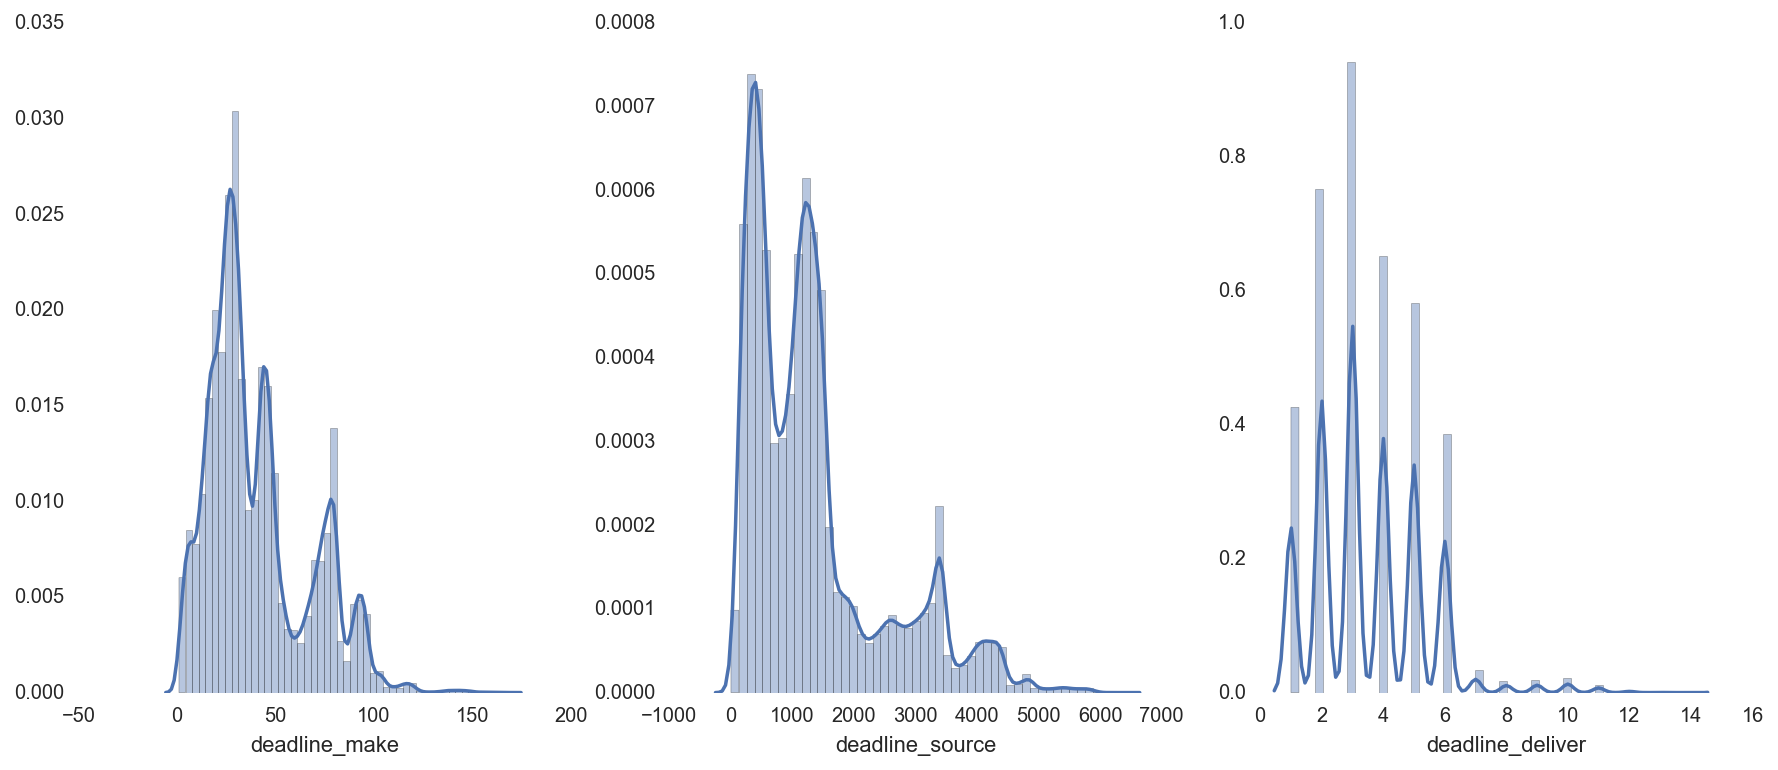

In [14]:
plt.rcParams['figure.figsize'] = 15, 6
plt.rcParams['axes.facecolor']='white'

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False)
sns.distplot(df['deadline_make'], ax = ax1)
sns.distplot(df['deadline_source'], ax = ax2)
sns.distplot(df['deadline_deliver'], ax = ax3)

In [28]:
print ( "make: ", np.std(df['deadline_make']) )
print ( "source: ", np.std(df['deadline_source']) )
print ( "deliver: ", np.std(df['deadline_deliver']) )

make:  25.3202245108
source:  1105.33649379
deliver:  1.74104813683


In [31]:
np.mean(df['deadline_make'])

40.581806128194415

## Skewness

- Of the numerical variables, the "units_per_order" is very highly skewed. Alleviate this by taking the log if doing a regression model.

In [29]:
# Evaluate skewness of variables
skew_val = pd.DataFrame(df.skew())
skew_val.reset_index(inplace=True)
skew_val.sort_values(by=0, inplace=True)

In [30]:
skew_val

,index,0
4,deadline_deliver,0.868362
3,deadline_make,0.883003
2,deadline_source,1.332921
1,transit_days,1.568931
0,units_per_order,41.575478


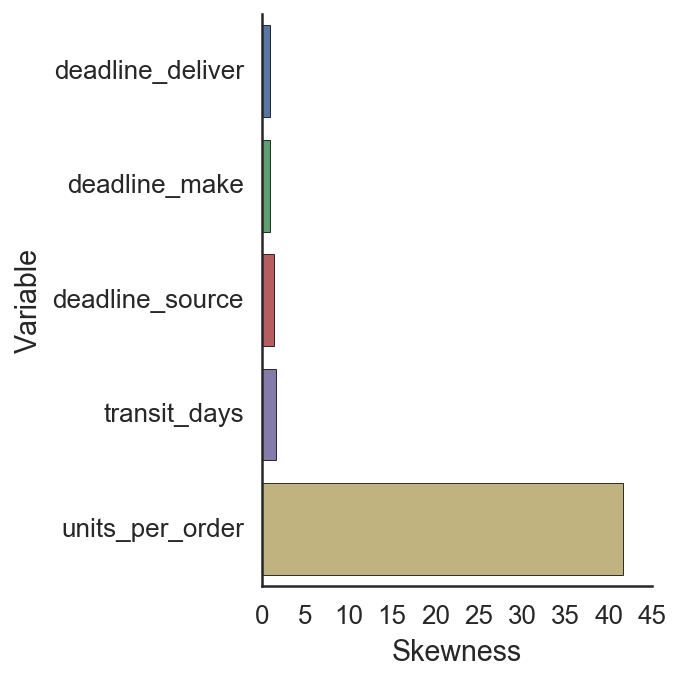

In [45]:
plt.rcParams['figure.figsize'] = 6, 6
plt.rcParams['axes.facecolor']='white' 
sns.factorplot(y="index", x=0, data=skew_val, kind="bar", ci=None, size=5, aspect=1)
plt.xlabel("Skewness")
plt.ylabel("Variable")

## Read in Data with new variables
- Read in the data after transforming with new features from 'featureEngineering' notebook
- New columns specifically examined are calendar days and months

In [4]:
# read in dummy variables data 
path = os.path.join('..','data_transformed_sample.csv')
df_transformed = pd.read_csv(path)

In [27]:
df_transformed.head()

,units_per_order,transit_days,deadline_source,deadline_make,deadline_deliver,source_dur,prod_ready_dur,deliver_dur,planned_diff,total_dur,...,order_day_Thursday,order_day_Tuesday,order_day_Wednesday,deliver_day_Friday,deliver_day_Monday,deliver_day_Saturday,deliver_day_Sunday,deliver_day_Thursday,deliver_day_Tuesday,deliver_day_Wednesday
0,1,2,1612,38,3,62.333333,20.831389,0.958542,0.0,75151,...,0,0,0,0,0,0,0,1,0,0
1,1,3,531,8,3,127.683333,5.011111,0.696481,0.0,85877,...,0,0,0,0,0,0,0,0,1,0
2,1,3,504,8,3,100.300000,4.010833,0.738229,0.0,84240,...,0,0,0,0,0,0,0,0,1,0
3,1,5,492,8,5,88.550000,4.010278,0.738252,0.0,83535,...,0,0,0,0,0,0,0,0,1,0
4,1,1,1567,6,1,244.333333,0.946111,0.629641,0.0,72467,...,0,0,0,0,0,0,0,0,0,1


## Correlations



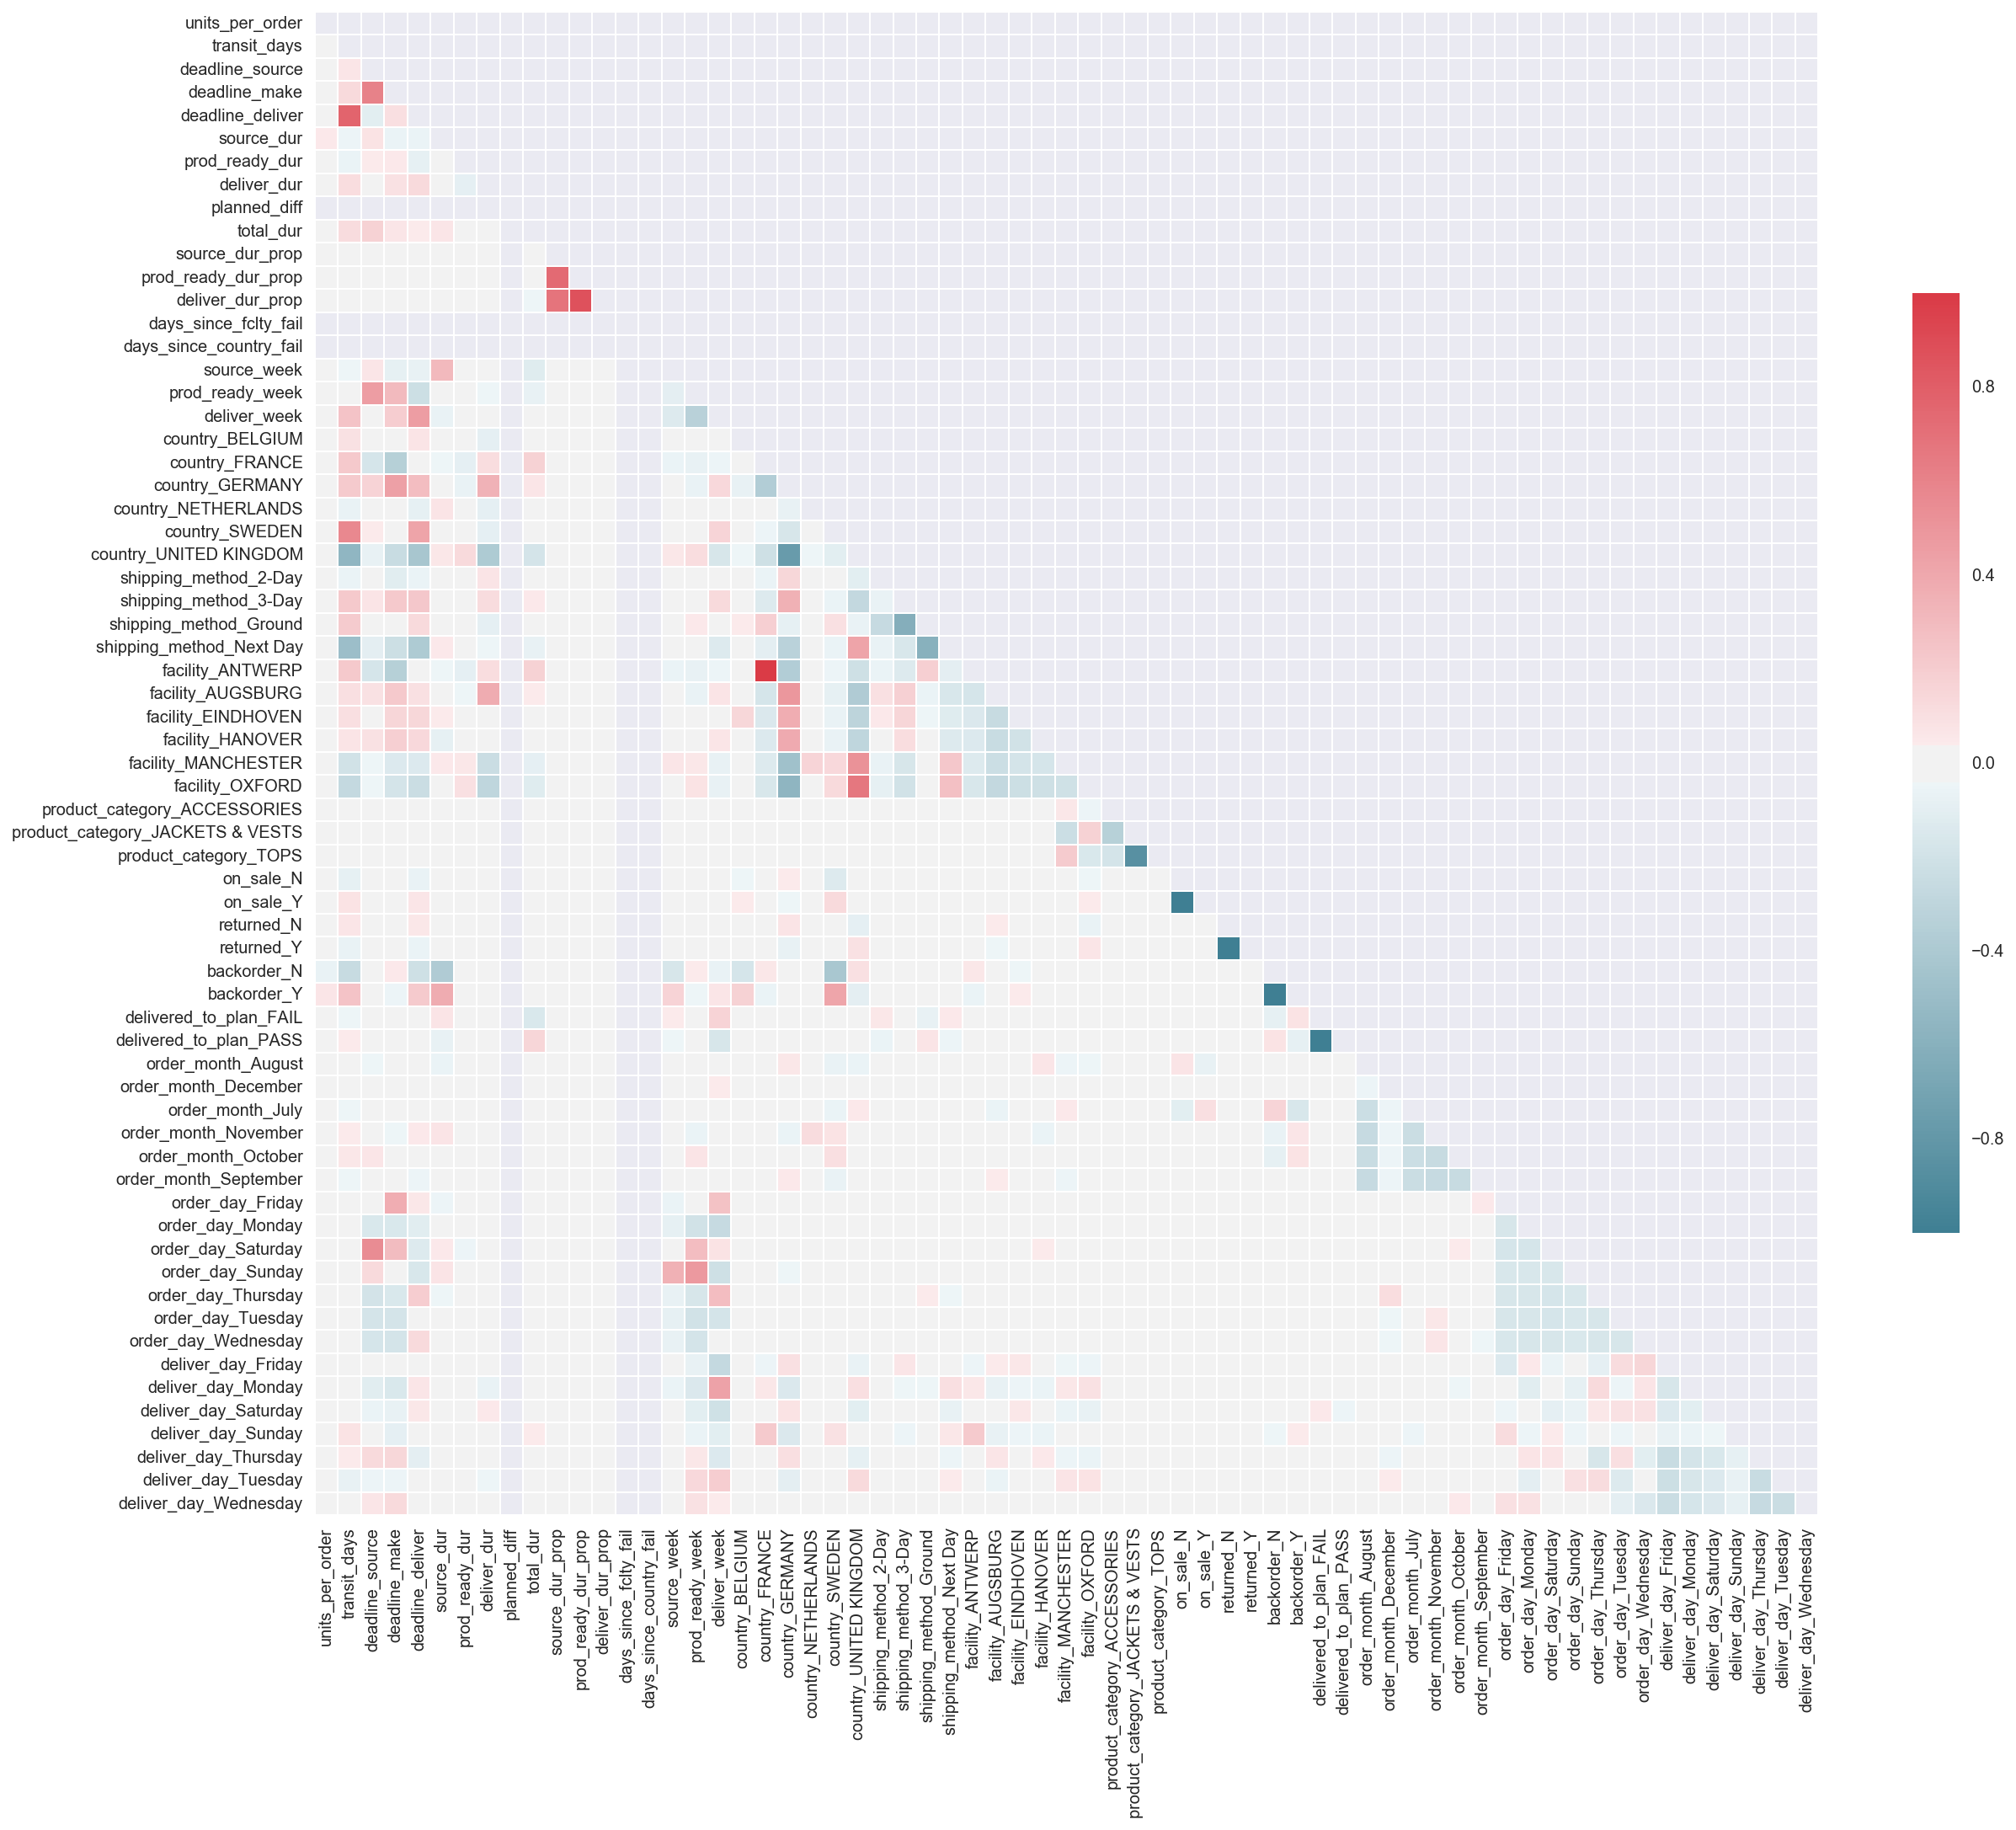

In [29]:
# Compute the correlation matrix
corr = df_transformed.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Does country and shipping method show changes in failures?

What we know:
- Ground is most popular for each country, which also makes sense that most of the failed deliveries come from ground.

- Countries that have ground and next day orders, ground is the highest in failure rate.
- Countries that have more than 2 shipping methods, ground is not as starkly high. The next failure option would be Next Day in UK, or 3 Day in Germany.

In [127]:
# where do failures come from for country and shipping method
subset = df_transformed[df_transformed['delivered_to_plan'] == 'FAIL'].copy()

In [131]:
proportions = (subset.groupby(['country','delivered_to_plan','shipping_method'])['delivered_to_plan'].count()
 .groupby(level = 0).transform(lambda x: x/x.sum())) 

proportions

country         delivered_to_plan  shipping_method
BELGIUM         FAIL               Ground             1.000000
FRANCE          FAIL               Ground             0.902957
                                   Next Day           0.097043
GERMANY         FAIL               2-Day              0.095629
                                   3-Day              0.265553
                                   Ground             0.580785
                                   Next Day           0.058034
NETHERLANDS     FAIL               Ground             0.920000
                                   Next Day           0.080000
SWEDEN          FAIL               Ground             1.000000
UNITED KINGDOM  FAIL               2-Day              0.006427
                                   Ground             0.509495
                                   Next Day           0.484078
Name: delivered_to_plan, dtype: float64

In [132]:
#subset = proportions[proportions['delivered_to_plan'] == 'FAIL'].copy()
proportions = pd.DataFrame(proportions)
proportions.columns = ['prop']
proportions.reset_index(inplace=True)

pivot = pd.pivot_table(proportions, index = ['country'], columns=['shipping_method'],values=['prop'])

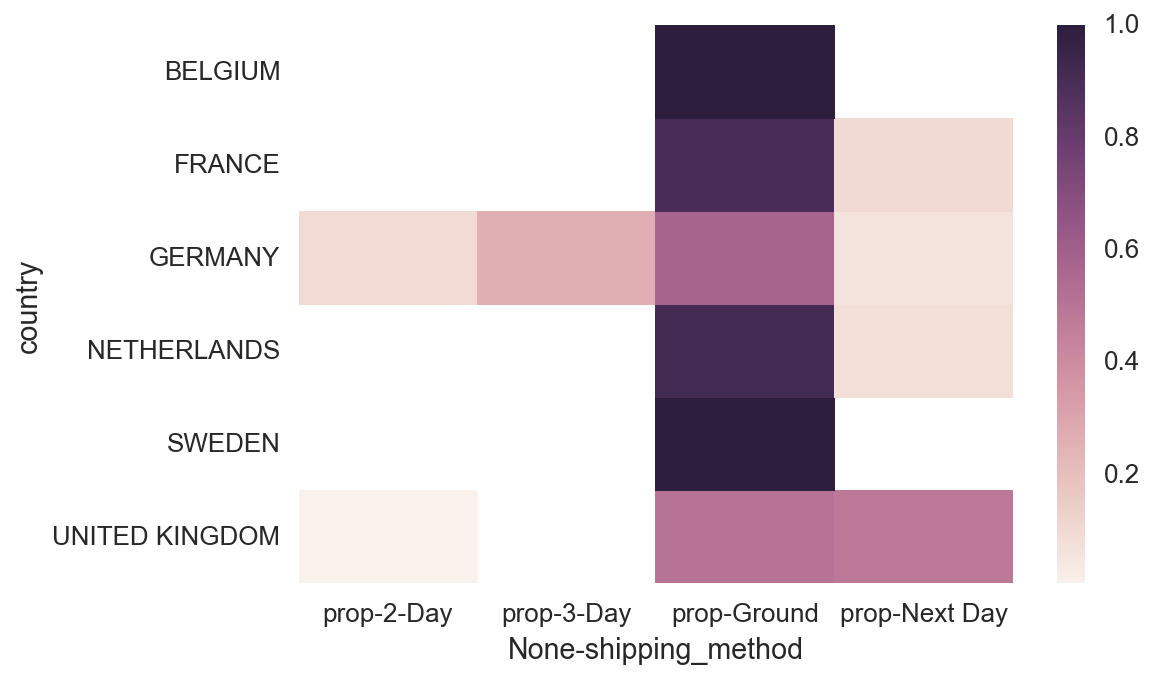

In [135]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(pivot)

## Do facilities show changes in failures?
- Some countries only have 1 facility where product is made. 
- For those that have different facilities, Germany and Sweden are pretty even on failrues, while UK has a ~60-40 split.


country         delivered_to_plan  facility  
BELGIUM         FAIL               EINDHOVEN     1.000000
FRANCE          FAIL               ANTWERP       1.000000
GERMANY         FAIL               AUGSBURG      0.386693
                                   EINDHOVEN     0.343428
                                   HANOVER       0.269879
NETHERLANDS     FAIL               MANCHESTER    1.000000
SWEDEN          FAIL               MANCHESTER    0.547085
                                   OXFORD        0.452915
UNITED KINGDOM  FAIL               MANCHESTER    0.378323
                                   OXFORD        0.621677
Name: delivered_to_plan, dtype: float64


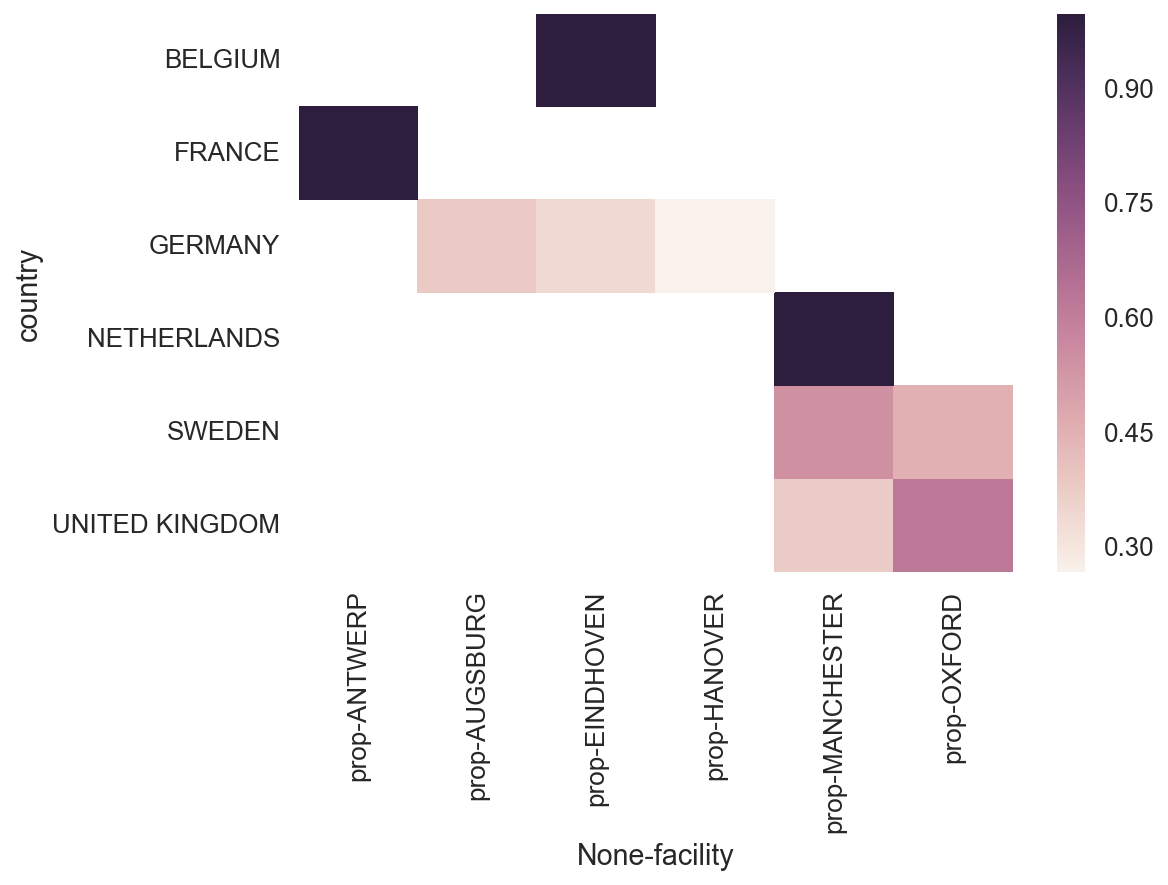

In [181]:
subset = df_transformed[df_transformed['delivered_to_plan'] == 'FAIL'].copy()

proportions = (subset.groupby(['country','delivered_to_plan','facility'])['delivered_to_plan'].count()
 .groupby(level = 0).transform(lambda x: x/x.sum())) 

print (proportions)

proportions = pd.DataFrame(proportions)
proportions.columns = ['prop']
proportions.reset_index(inplace=True)

pivot = pd.pivot_table(proportions, index = ['country'], columns=['facility'],values=['prop'])

f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(pivot)

facility    delivered_to_plan  country       
ANTWERP     FAIL               FRANCE            1.000000
AUGSBURG    FAIL               GERMANY           1.000000
EINDHOVEN   FAIL               BELGIUM           0.045605
                               GERMANY           0.954395
HANOVER     FAIL               GERMANY           1.000000
MANCHESTER  FAIL               NETHERLANDS       0.034083
                               SWEDEN            0.083163
                               UNITED KINGDOM    0.882754
OXFORD      FAIL               SWEDEN            0.045312
                               UNITED KINGDOM    0.954688
Name: delivered_to_plan, dtype: float64


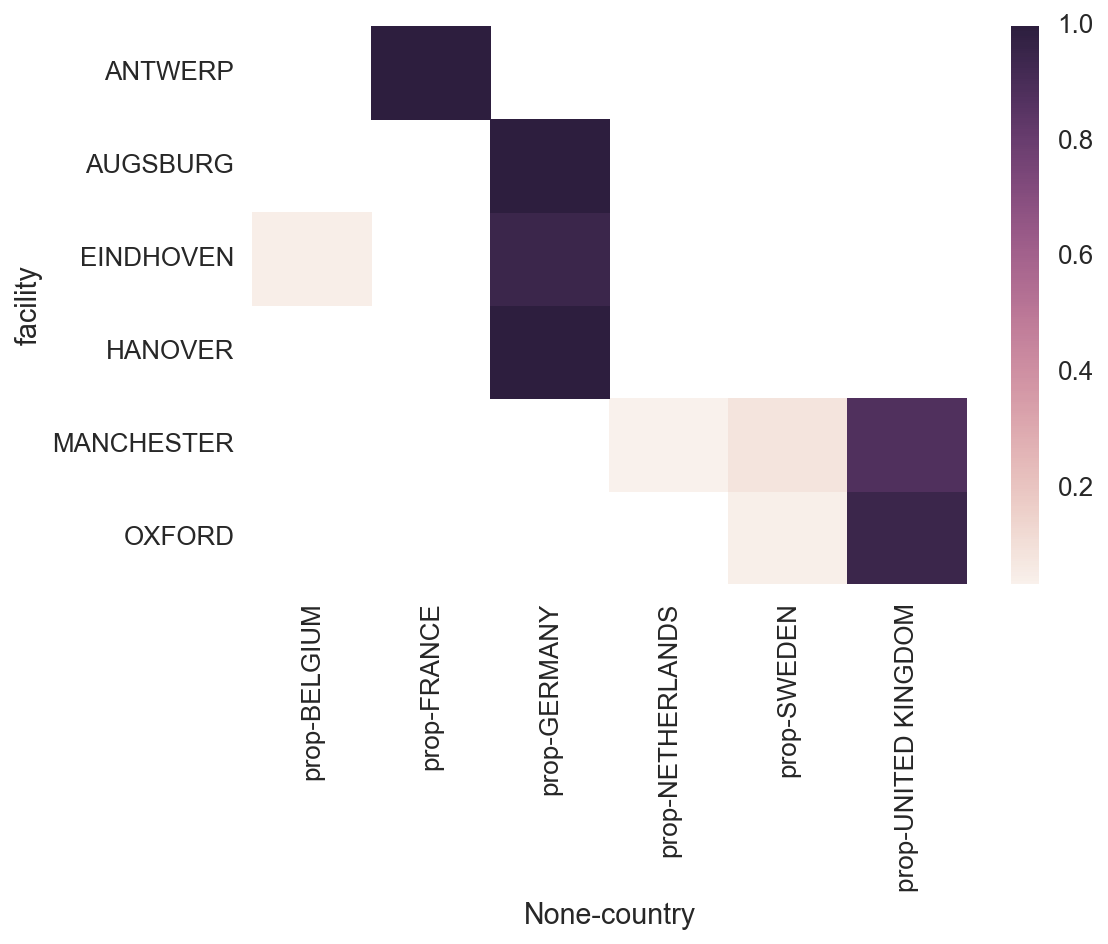

In [183]:
subset = df_transformed[df_transformed['delivered_to_plan'] == 'FAIL'].copy()

proportions = (subset.groupby(['facility','delivered_to_plan','country'])['delivered_to_plan'].count()
 .groupby(level = 0).transform(lambda x: x/x.sum())) 

print (proportions)

proportions = pd.DataFrame(proportions)
proportions.columns = ['prop']
proportions.reset_index(inplace=True)

pivot = pd.pivot_table(proportions, index = ['facility'], columns=['country'],values=['prop'])

f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(pivot)

## Where do failures occur?
- Mostly in Germany (by numbers), but in Belgium by proportions within a country

In [142]:
proportions = (df_transformed.groupby(['country','delivered_to_plan'])['delivered_to_plan'].count()
 .groupby(level = 0).transform(lambda x: x/x.sum())) 

proportions

country         delivered_to_plan
BELGIUM         FAIL                 0.230126
                PASS                 0.769874
FRANCE          FAIL                 0.105530
                PASS                 0.894470
GERMANY         FAIL                 0.108526
                PASS                 0.891474
NETHERLANDS     FAIL                 0.104603
                PASS                 0.895397
SWEDEN          FAIL                 0.091619
                PASS                 0.908381
UNITED KINGDOM  FAIL                 0.098626
                PASS                 0.901374
Name: delivered_to_plan, dtype: float64

In [143]:
#subset = proportions[proportions['delivered_to_plan'] == 'FAIL'].copy()
proportions = pd.DataFrame(proportions)
proportions.columns = ['prop']
proportions.reset_index(inplace=True)

pivot = pd.pivot_table(proportions, index = ['country'], columns=['delivered_to_plan'],values=['prop'])

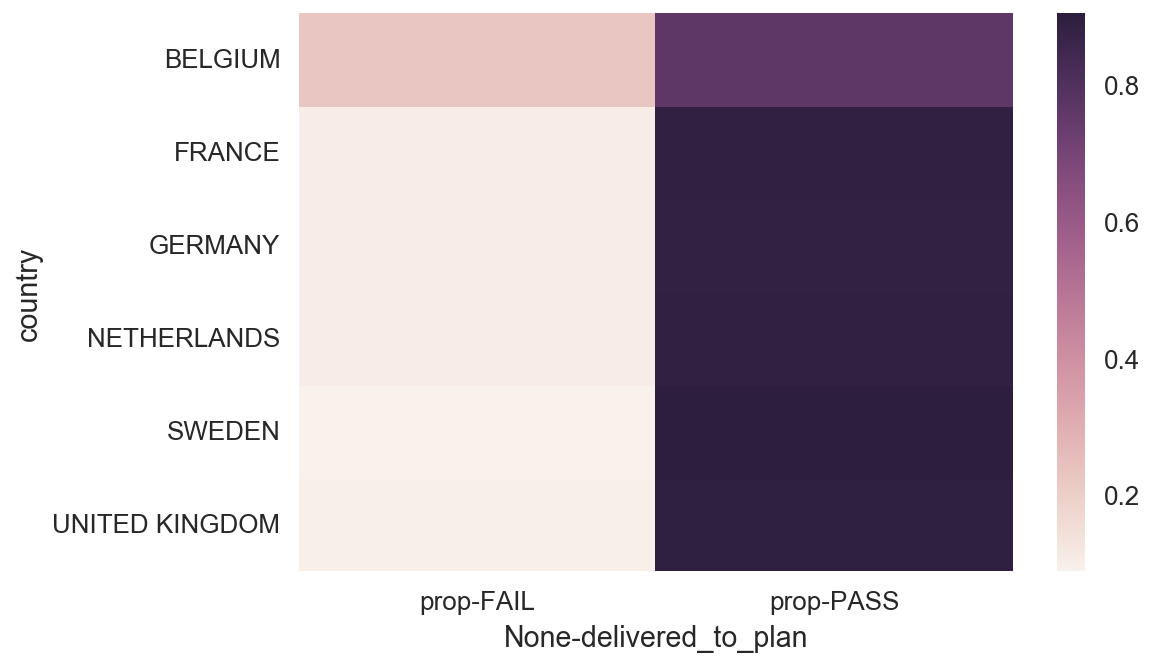

In [144]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(pivot)

In [150]:
df_transformed[df_transformed['country'] == 'BELGIUM']['delivered_to_plan'].value_counts()

PASS    368
FAIL    110
Name: delivered_to_plan, dtype: int64

In [151]:
# proportion of failures for all of Belgium orders
110/(110+368)

0.2301255230125523

## What type of products have failures?

- product_category and on sale: pretty equal of pass/fail rate for each category
- backordered: items on backorder are more likely to have failures

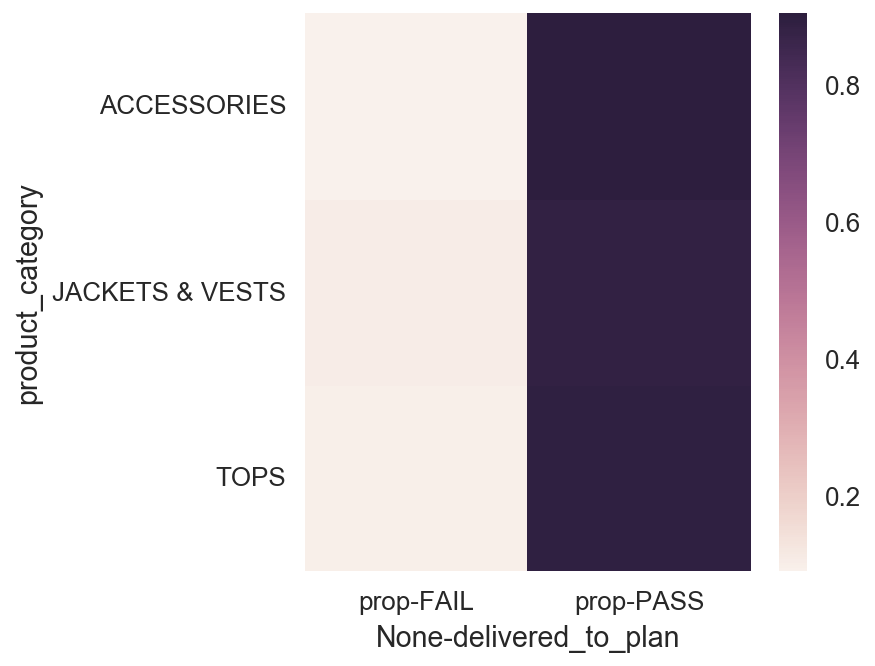

In [163]:
proportions = (df_transformed.groupby(['product_category','delivered_to_plan'])['delivered_to_plan'].count()
 .groupby(level = 0).transform(lambda x: x/x.sum())) 

proportions = pd.DataFrame(proportions)
proportions.columns = ['prop']
proportions.reset_index(inplace=True)

pivot = pd.pivot_table(proportions, index = ['product_category'], columns=['delivered_to_plan'],values=['prop'])

f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(pivot)

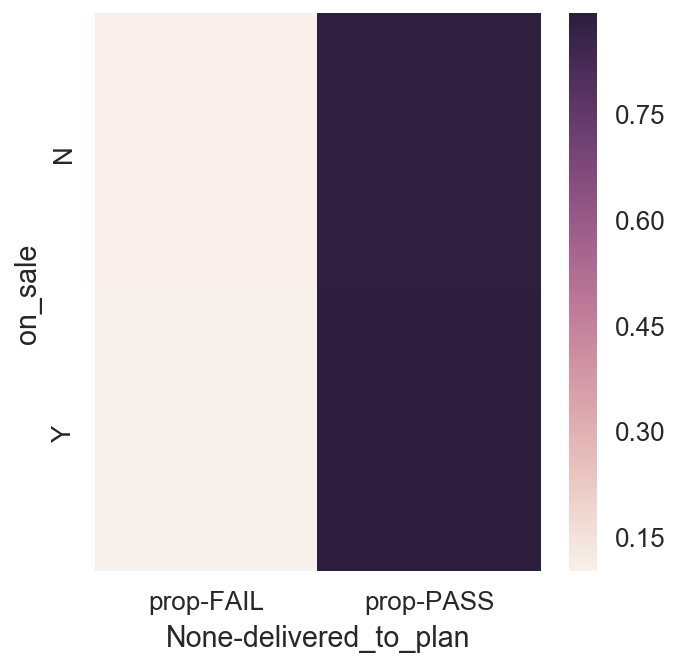

In [161]:
proportions = (df_transformed.groupby(['on_sale','delivered_to_plan'])['delivered_to_plan'].count()
 .groupby(level = 0).transform(lambda x: x/x.sum())) 

proportions = pd.DataFrame(proportions)
proportions.columns = ['prop']
proportions.reset_index(inplace=True)

pivot = pd.pivot_table(proportions, index = ['on_sale'], columns=['delivered_to_plan'],values=['prop'])

f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(pivot)

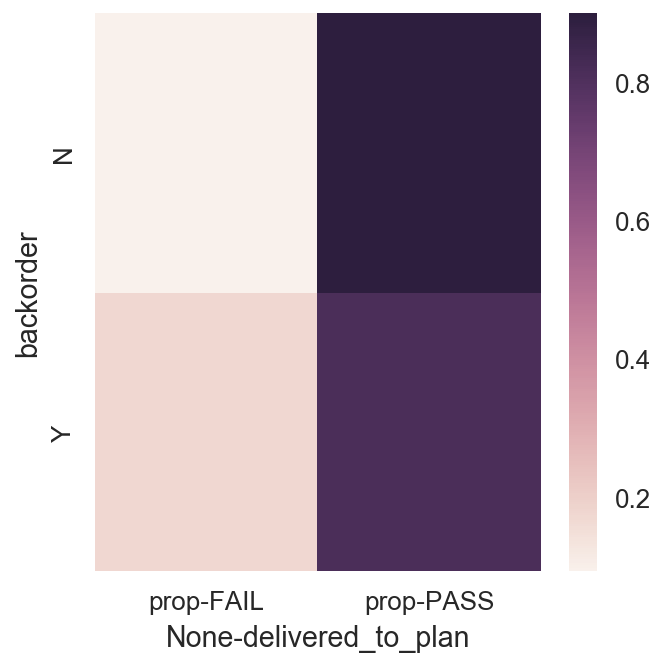

In [162]:
proportions = (df_transformed.groupby(['backorder','delivered_to_plan'])['delivered_to_plan'].count()
 .groupby(level = 0).transform(lambda x: x/x.sum())) 

proportions = pd.DataFrame(proportions)
proportions.columns = ['prop']
proportions.reset_index(inplace=True)

pivot = pd.pivot_table(proportions, index = ['backorder'], columns=['delivered_to_plan'],values=['prop'])

f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(pivot)

backorder  delivered_to_plan  product_category
N          FAIL               ACCESSORIES         0.005928
                              JACKETS & VESTS     0.061140
                              TOPS                0.029152
           PASS               ACCESSORIES         0.064201
                              JACKETS & VESTS     0.550896
                              TOPS                0.288682
Y          FAIL               ACCESSORIES         0.010487
                              JACKETS & VESTS     0.112634
                              TOPS                0.055326
           PASS               ACCESSORIES         0.056482
                              JACKETS & VESTS     0.494880
                              TOPS                0.270190
Name: product_category, dtype: float64


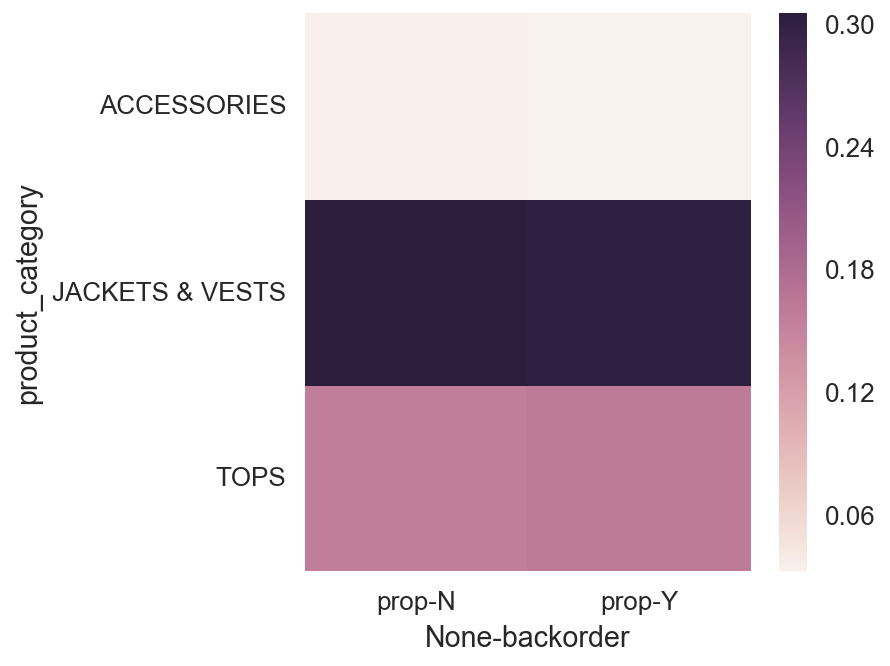

In [179]:
#subset = df_transformed[df_transformed['delivered_to_plan'] == 'FAIL'].copy()

proportions = (df_transformed.groupby(['backorder','delivered_to_plan','product_category'])['product_category'].count()
 .groupby(level = 0).transform(lambda x: x/x.sum())) 

print (proportions)

proportions = pd.DataFrame(proportions)
proportions.columns = ['prop']
proportions.reset_index(inplace=True)

pivot = pd.pivot_table(proportions, index = ['product_category'], columns=['backorder'],values=['prop'])

f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(pivot)

## How does slack time vary with failures?
- Source: failures have lower slack time
- Make: failures have higher slack time
- Deliver: failures have lower slack time


In [8]:
pd.DataFrame(df_transformed.groupby(['delivered_to_plan_FAIL'])['deadline_source','deadline_make','deadline_deliver'].mean())

,deadline_source,deadline_make,deadline_deliver
delivered_to_plan_FAIL,,,
0,1346.026055,40.512804,3.523330
1,1256.643258,41.168320,3.452075
